In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("./sample_code.csv", lineterminator='\n')

In [3]:
df.head()

,content,type
0,// Utility.cs\n//\n\nusing System;\nusing Syst...,cs
1,\n{$options.identity.sitename} - Your Accounts...,txt
2,"{\n ""name"": ""opulence/sessions"",\n ""descript...",json
3,package io.mycat.backend.postgresql.packet;\r\...,java
4,TAPi18n._afterUILanguageChange = function() {\...,js


In [4]:
df.describe(include='all')

,content,type
count,681918,681912
unique,681917,33583
top,"street_name_no,plz,city,attr1,geom_wkt,geom\n""...",js
freq,2,49464


In [5]:
df.loc[df['type'].isin(['C', 'cpp', 'cc', 'h']), 'type'] = 'cpp'
## Combine .html & .htm to .html, say
df.loc[df['type'].isin(['html', 'htm']), 'type'] = 'html'

In [6]:
indexNames = df[ df['type'].isin(['cpp', 'Dockerfile','php','html','py','swift','java','rb','cs','go','js','ts'])== False].index

In [7]:
df.drop(indexNames , inplace=True)
df = df.reset_index(drop=True)

In [8]:
df.iloc[np.random.permutation(len(df))]

,content,type
233844,﻿// Copyright (c) 2013 Romain Vallet <romain.v...,js
196096,describe Spree do\n describe '.solidus_versio...,rb
224497,"﻿/*\nCopyright (c) 2003-2013, CKSource - Frede...",js
252711,// Copyright 2009 the Sputnik authors. All ri...,js
36080,/* jshint node:true */\n(function () {\n\t'use...,js
...,...,...
30528,"var rootview, page;\r\nrootview = ui(""$"");\r\n...",js
234082,"/*\n * Licensed under the Apache License, Vers...",java
251868,// Copyright (c) Microsoft. All Rights Reserv...,cs
40091,﻿using Microsoft.Owin;\nusing Owin;\n\n[assemb...,cs


In [9]:
df.describe(include='all')

,content,type
count,262327,262327
unique,262327,12
top,package org.glob3.mobile.generated; \r\npublic...,js
freq,1,49464


In [10]:
type_counts = df['type'].value_counts().to_frame()

In [11]:
langs = list(type_counts.index)

In [12]:
new_df = pd.DataFrame(columns=['content', 'type'])

In [13]:
for lang in langs:
    new_df = new_df.append(df[ df['type'] == lang][:10000], ignore_index=True)

In [14]:
df = new_df
new_df = []
df

,content,type
0,TAPi18n._afterUILanguageChange = function() {\...,js
1,import Promise from 'bluebird';\n\nconst ONE_S...,js
2,//>>built\ndefine(\n//begin v1.x content\n({\n...,js
3,import { themr } from 'react-css-themr';\nimpo...,js
4,//// [unqualifiedCallToClassStatic1.ts]\r\ncla...,js
...,...,...
95983,FROM golang:1.5\n\n## dkv-netshare is BASE ima...,Dockerfile
95984,# Set the base image to Ubuntu\nFROM node:late...,Dockerfile
95985,FROM debian:jessie\nMAINTAINER David Personett...,Dockerfile
95986,#\n# Node.js Versioned w/ Bower & Gulp Dockerf...,Dockerfile


In [15]:
#df=df[:90000]

In [16]:
type_counts = df['type'].value_counts().to_frame().reset_index()

In [17]:
type_counts

,index,type
0,php,10000
1,rb,10000
2,java,10000
3,cs,10000
4,html,10000
5,js,10000
6,cpp,10000
7,py,10000
8,swift,6273
9,go,6004


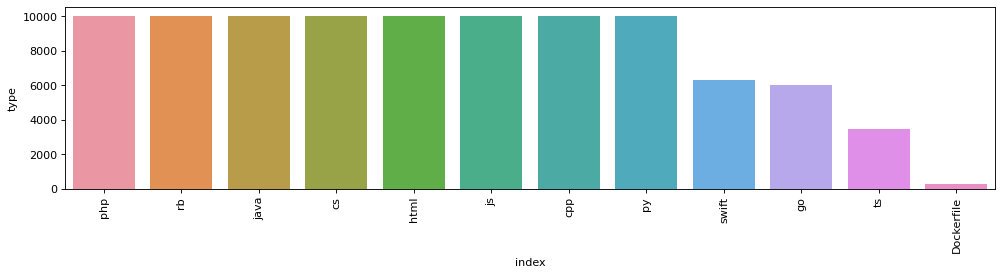

In [19]:
plt.figure(figsize=(15, 3), dpi=80)
sns.barplot(data=type_counts, x='index', y='type');
plt.xticks(rotation=90);

In [20]:
df

,content,type
0,TAPi18n._afterUILanguageChange = function() {\...,js
1,import Promise from 'bluebird';\n\nconst ONE_S...,js
2,//>>built\ndefine(\n//begin v1.x content\n({\n...,js
3,import { themr } from 'react-css-themr';\nimpo...,js
4,//// [unqualifiedCallToClassStatic1.ts]\r\ncla...,js
...,...,...
95983,FROM golang:1.5\n\n## dkv-netshare is BASE ima...,Dockerfile
95984,# Set the base image to Ubuntu\nFROM node:late...,Dockerfile
95985,FROM debian:jessie\nMAINTAINER David Personett...,Dockerfile
95986,#\n# Node.js Versioned w/ Bower & Gulp Dockerf...,Dockerfile


In [21]:
docs = df['content']

In [22]:
from bertopic import BERTopic

In [23]:
import bertopic
bertopic.__version__

'0.8.1'

In [24]:
from sentence_transformers import SentenceTransformer
sentence_model = SentenceTransformer("huggingface/CodeBERTa-small-v1", device="cuda")
topic_model = BERTopic(embedding_model=sentence_model,verbose=True, n_gram_range=(1,2))

In [ ]:
topics, probabilities = topic_model.fit_transform(docs)

Batches:   0%|          | 0/3000 [00:00<?, ?it/s]

2021-06-14 06:42:58,981 - BERTopic - Transformed documents to Embeddings
2021-06-14 06:43:41,695 - BERTopic - Reduced dimensionality with UMAP
2021-06-14 06:43:45,357 - BERTopic - Clustered UMAP embeddings with HDBSCAN


In [48]:
topic_model.get_topic_info()[topic_model.get_topic_info()["Count"]>100]

,Topic,Count,Name
0,-1,35798,-1_log_if err_print_println
1,0,1766,0_reserved import_import foundation_import uik...
2,1,1248,1_end def_def initialize_def self_private def
3,2,1161,2___init_____init__ self_def __init___from django
4,3,1097,3_endblock_endblock block_block content_endblo...
...,...,...,...
115,114,109,114_assert_equal_unit testcase_test unit_test_...
116,115,107,115_add lang_feb_am pm_jun jul
117,116,106,116_assert equal_testify_stretchr testify_stre...
118,117,104,117_fla_obj_fla_obj fla_obj_eth zurich_group p...


In [33]:
topic_model.save("95k_10k_per_class_data_microsoft_codebert-base")

In [34]:
viz_df = df[:1000]

In [23]:
viz_classes = df['type']
viz_docs = df['content']

In [24]:
topic_model = BERTopic.load("95k_10k_per_class_data_microsoft_codebert-base")

In [25]:
topics_per_class = topic_model.topics_per_class(viz_docs, topics, classes=viz_classes)

NameError: name 'topics' is not defined

In [3]:
fig_unsupervised = topic_model.visualize_topics_per_class(topics_per_class, top_n_topics=100, width=900)
fig_unsupervised

NameError: name 'topics_per_class' is not defined

,Topic,Words,Frequency,Class,Name
49,113,"unlike, predefined, builds, scss, webpack",2,ts,113_precompiled_subsonic_knesset_httpwar...
252,113,"assemblytitle, reflection, following, modify, ...",1,cs,113_precompiled_subsonic_knesset_httpwar...
468,113,"subsonic, precompiled, bobblehat, netflow1, el...",46,go,113_precompiled_subsonic_knesset_httpwar...
584,113,"knesset, protocols, dataservice, chunked_uploa...",14,py,113_precompiled_subsonic_knesset_httpwar...
1036,113,"playground, precompiled, automatically, boolpl...",12,swift,113_precompiled_subsonic_knesset_httpwar...
1418,113,"kahuna, mesosphere, tutorials, signatures, key...",4,js,113_precompiled_subsonic_knesset_httpwar...
1692,113,"repositorysymbols, arcanist, t8691, t8697, 201...",2,php,113_precompiled_subsonic_knesset_httpwar...
2006,113,"internally, temporary, attached, playground, p...",1,html,113_precompiled_subsonic_knesset_httpwar...
2233,113,"compass, playground, cpm, precompiled, buford",1,rb,113_precompiled_subsonic_knesset_httpwar...


In [66]:
topic_model.find_topics("django")

([73, -1, 536, 563, 549],
 [0.826283986756915,
  0.8187324343429478,
  0.8107601742197176,
  0.8090353504647835,
  0.8042859563548455])

In [69]:
topic_model.get_topic(73)

[('sqlite3', 0.011698670708952558),
 ('engine django', 0.011126440785544343),
 ('getattr settings', 0.01101886132077499),
 ('db backends', 0.010750031349267003),
 ('os environ', 0.008782982832304526),
 ('backends sqlite3', 0.008701782012700781),
 ('django contrib', 0.008228007341104257),
 ('sqlalchemy_database_uri', 0.00667962246598507),
 ('django db', 0.005869162928857176),
 ('sqlite3 name', 0.005529970098974824)]

In [59]:
new_doc = """
import WebKit

protocol GithubWebViewProtocol: UIViewController {
    func close()
    func loadWebView(with: URLRequest)
}

final class GithubWebView: UIViewController, WKNavigationDelegate, GithubWebViewProtocol {

    // MARK: - Components & vars

    var presenter: GithubWebPresenterProtocol?

    lazy var webView: WKWebView = {
        let webView = WKWebView()
        webView.navigationDelegate = self
        return webView
    }()

    // MARK: - Lifecycle

    override func loadView() {
        view = webView
    }

    override func viewDidLoad() {
        super.viewDidLoad()
        presenter?.viewLoaded()
    }

    // MARK: - GithubWebViewProtocol

    func close() {
        dismiss(animated: true, completion: nil)
    }

    func loadWebView(with request: URLRequest) {
        webView.load(request)
    }

    // MARK: - WKNavigationDelegate

    func webView(
        _: WKWebView,
        decidePolicyFor navigationAction: WKNavigationAction,
        decisionHandler: @escaping (WKNavigationActionPolicy) -> Void)
    {
        presenter?.requestForCallbackURL(request: navigationAction.request)
        decisionHandler(.allow)
    }
}
"""

In [60]:
print(new_doc.split('\n\n')[2])

final class GithubWebView: UIViewController, WKNavigationDelegate, GithubWebViewProtocol {


In [61]:
len(new_doc.split('\n'))

53

In [62]:
topics = topic_model.transform(new_doc.split('\n'))

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

In [63]:
topics_per_class[ topics_per_class["Topic"] == 503]

,Topic,Words,Frequency,Class,Name
375,503,"export from, from base, from structure, from s...",23,ts,503_export from_from base_from class_fro...
576,503,"js export, export from, validators appcache, e...",1,js,503_export from_from base_from class_fro...


In [64]:
topics

([-1,
  -1,
  -1,
  0,
  96,
  -1,
  -1,
  -1,
  0,
  -1,
  724,
  -1,
  0,
  -1,
  -1,
  0,
  -1,
  -1,
  -1,
  -1,
  280,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  40,
  -1,
  -1,
  -1,
  280,
  -1,
  -1,
  25,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  98,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  40,
  -1,
  -1,
  -1],
 None)

In [65]:
for topic in topics[0]:
    if topic > 0:
        print("Topic", topic)
        print(topic_model.get_topic(topic), "\n")

Topic 96
[('string return', 0.021375771075808455), ('name string', 0.00997423219033105), ('string func', 0.008074658086666036), ('string string', 0.00747562252744475), ('return fmt', 0.007319313716841196), ('struct stmtbase', 0.00716583276494525), ('struct func', 0.006494404924042897), ('key string', 0.006184946365478928), ('string error', 0.0058951442884542385), ('return func', 0.005260826679552172)] 

Topic 724
[('es5 experimentaldecorators', 0.10766610816485529), ('propertykey string', 0.10245373946428928), ('experimentaldecorators true', 0.09652836210153948), ('target es5', 0.08134775558346714), ('any propertykey', 0.06281076119267102), ('typedpropertydescriptor', 0.061523490379917306), ('dec class', 0.03599248827344662), ('function propertykey', 0.03599248827344662), ('any param5', 0.03599248827344662), ('symbol parameterindex', 0.03599248827344662)] 

Topic 280
[('awselasticloadbalancingversionstring', 0.009248607866981541), ('awselasticloadbalancingversionnumber foundation_expor